O projeto deve ser feito em grupo 5 ou 6 e será apresentado dia 24/01.
Pode ser apresentado por um ou dois membro(s) da equipe.
Tempo aproximado 10 a 20 min.

Como o projeto será avaliado, o notebook deve conter:
1) Criar uma lista de dicas/técnicas que aprenderam neste módulo que foram usadas no projeto

2) Indicar dentro do notebook cada item da lista (vide exemplo abaixo)

3) Estar publicado no Github

4) Você está apresentando as conclusões dos dados, pense com a cabeça de negócio, ex:

Qual a média de idade dos clientes que mais compraram?
Quantos porcento dos clientes que mais compraram, são os de maior ticket?
Quais os dias da semana os clientes mais compram?
Qual o percentual de crianças e adultos dentro nossos clientes?
Não queremos explicações de como funciona o código, queremos perguntas e respostas de negócio.

Esses quatro itens são obrigatórios, caso contrário não serão aceitos.

01) Leitura de arquivo com dados
02) Preenchimento valores faltantes
03) Normalização
04) Transformação de Categórico para Numérico
05) Tratamento de Datas
06) Demonstração tipos de dados
07) Quantidade de linhas de colunas
08) Mesclagem de Data Frames
09) Eliminar linhas duplicadas
10) Redefinição de indice
11) Agrupamento
12) Criar novas colunas (pode tentar)
13) Aplicar funções e lambdas
14) Encontrar maior/menores valores
15) Separar os top 1%
16) Manipulação de datas
17) Visualização de dados utilizando Matplotlib

In [9]:
# Item 16) Manipulação de datas
# Pergunta: Quais são os dias da semana... ?
datetime....

SyntaxError: invalid syntax (2058272993.py, line 3)

Requisitos para a escolha da base de dados:

Esteja em 2 arquivos
Não esteja completo
Tenha dados categóricos(qualitativos) e numéricos(quantitativos)
Tenha datas
Quantidade de campos grande (facilita pensar em perguntas de negócio para responder)

Dataset selecionado:
https://www.kaggle.com/code/melikedilekci/supermarket-sales-eda/notebook

Retirar:
    
invoice id

cogs

gross margin

gross income


tarefas:

Fazer Gráfico das Perguntas - Leo    

Adicionar nuvem de palavras - Rafa


------fpdf ou pytofdp, ou pdfkit


Plus [ Se possível, adicionar um código para exportação do contéudo em pdf.]

Usar ! para tarefas feitas.

OK para tarefas prontas com gráficos e perguntas/insights**

Perguntas sobre data:


a) Qual o horario de pico. (Dimensionar quantiade de vendeddores e caixas 

disponiveis para supir picos de visitas, se existirem). (*feriados, sábado, domingo)

! b) Ticket Médio

d) Qual dia do mês mais vende (*feriados, sábado, domingo)

e) Qual horario favorito dos homens/mulheres. 

g) Horario em que mais se vende cada categoria de produto. x horario

f) Ticket médio por horario

g) Horarios mais lucrativos

i) Periodo do mês com maior volume de compras.


Perguntas sobre genero:
! a) Qual tipo de genero consome cada tipo dos produtos disponiveis
! b) Ticket médio por genero.

a) Média de avaliações

! b) Qual a categoria (top3) das categorias de produtos mais vendidas

! b) Qual a categoria (top3) das categorias de produtos menos vendidas

c) Meio de pagamento x membership (tentar vender cartão da c&a.)

! d) Quantidade de Membros x Fidelização

e) *** dentro de um numero x de vendas no mes, quantas foram para afiliados?


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df_importacao_completo = pd.read_csv('supermarket_sales.csv')

In [6]:
metade = len(df_importacao_completo) // 2

In [7]:
df_importacao_parte1 = df_importacao_completo.iloc[:metade, :]
df_importacao_parte2 = df_importacao_completo.iloc[metade:, :]

In [8]:
df_importacao_parte1.to_csv('supermarket_sales_1.csv', index=False)
df_importacao_parte2.to_csv('supermarket_sales_2.csv', index=False)

In [9]:
df_parte1 = pd.read_csv('supermarket_sales_1.csv')
df_parte2 = pd.read_csv('supermarket_sales_1.csv')

In [10]:
df = pd.concat([df_parte1, df_parte2], ignore_index=True)

In [11]:
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [12]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [13]:
colunas_para_remover = ['Invoice ID', 'cogs', 'gross margin percentage', 'gross income']

In [14]:
df = df.drop(colunas_para_remover, axis=1)
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,B,Mandalay,Normal,Male,Sports and travel,75.92,8,30.3680,637.7280,3/20/2019,14:14,Cash,5.5
996,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.3220,132.7620,1/1/2019,15:51,Cash,8.5
997,C,Naypyitaw,Normal,Female,Food and beverages,90.24,6,27.0720,568.5120,1/27/2019,11:17,Cash,6.2
998,B,Mandalay,Member,Female,Sports and travel,98.13,1,4.9065,103.0365,1/21/2019,17:36,Cash,8.9


### Pergunta: Qual a divisão de métodos de pagamento por gênero?

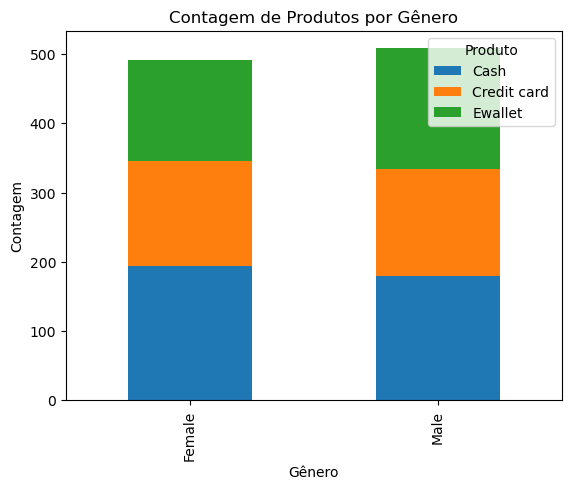

In [16]:
product_gender_count = df.groupby(['Gender', 'Payment']).size().unstack()

product_gender_count.plot(kind='bar', stacked=True)
plt.title('Contagem de Produtos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Produto')

plt.show()


### Pergunta: Qual a relação entre os afiliados e os não afiliados?

In [17]:
df_membros = df['Customer type'].value_counts()

In [18]:
df_membros

Customer type
Normal    518
Member    482
Name: count, dtype: int64

In [19]:
membros_afiliados = df.loc[df['Customer type'] == 'Member']
membros_normais = df.loc[df['Customer type'] == 'Normal']

In [20]:
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'Rating'],
      dtype='object')

In [21]:
membros_normais['Customer type']

1      Normal
2      Normal
4      Normal
5      Normal
7      Normal
        ...  
990    Normal
994    Normal
995    Normal
996    Normal
997    Normal
Name: Customer type, Length: 518, dtype: object

In [22]:
df_membros['Member']

482

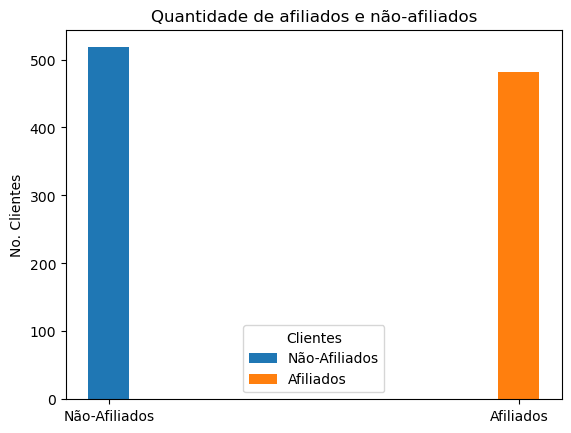

In [23]:
fig, ax = plt.subplots()

fruits = ['Não-Afiliados', 'Afiliados']
counts = [df_membros['Normal'], df_membros['Member']]
bar_labels = ['blue', 'orange']
bar_colors = ['tab:blue', 'tab:orange']

ax.bar(fruits, counts, label=fruits, color=bar_colors, width=0.1)

ax.set_ylabel('No. Clientes')
ax.set_title('Quantidade de afiliados e não-afiliados')
ax.legend(title='Clientes')

plt.show()

## Ticket Médio

In [24]:
df['Total'].mean()

329.995701

In [25]:
ticket_medio_genero = df.groupby('Gender').agg({'Total': 'sum', 'Quantity': 'count'})

ticket_medio_genero.rename(columns={'Total': 'Montante', 'Quantity': 'No. Compras'}, inplace=True)

ticket_medio_genero['Ticket Médio'] = ticket_medio_genero['Montante'] / ticket_medio_genero['No. Compras']

print(ticket_medio_genero[['Montante', 'No. Compras', 'Ticket Médio']])



          Montante  No. Compras  Ticket Médio
Gender                                       
Female  169654.611          492    344.826445
Male    160341.090          508    315.632067


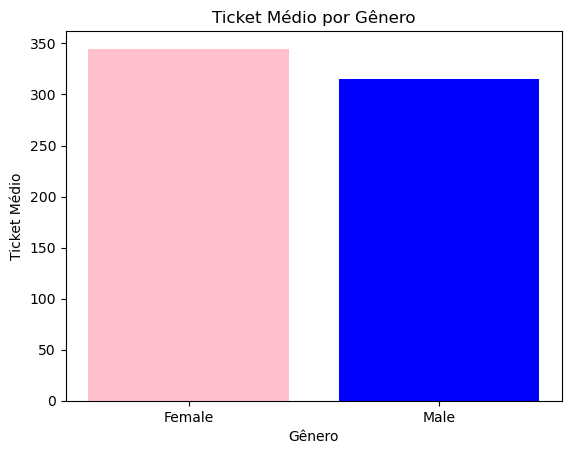

In [26]:
plt.bar(ticket_medio_genero.index, ticket_medio_genero['Ticket Médio'], color=['pink', 'blue'])

plt.xlabel('Gênero')
plt.ylabel('Ticket Médio')
plt.title('Ticket Médio por Gênero')
plt.show()


## Top3 das categorias de produtos mais vendidas

In [27]:
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'Rating'],
      dtype='object')

In [28]:
produtos_mais_vendidos = df.groupby('Product line')['Quantity'].sum()
produtos_mais_vendidos

Product line
Electronic accessories    956
Fashion accessories       918
Food and beverages        980
Health and beauty         884
Home and lifestyle        956
Sports and travel         998
Name: Quantity, dtype: int64

In [29]:
top3_mais_vendidos = produtos_mais_vendidos.sort_values(ascending=False).head(3)
top3_mais_vendidos

Product line
Sports and travel         998
Food and beverages        980
Electronic accessories    956
Name: Quantity, dtype: int64

## Top3 das categorias de produtos menos vendidas

In [30]:
produtos_menos_vendidos = df.groupby('Product line')['Quantity'].sum()
produtos_menos_vendidos

Product line
Electronic accessories    956
Fashion accessories       918
Food and beverages        980
Health and beauty         884
Home and lifestyle        956
Sports and travel         998
Name: Quantity, dtype: int64

In [31]:
top3_menos_vendidos = produtos_menos_vendidos.sort_values(ascending=True).head(3)
top3_menos_vendidos

Product line
Health and beauty         884
Fashion accessories       918
Electronic accessories    956
Name: Quantity, dtype: int64

## Data

In [32]:
df['Date'] = pd.to_datetime(df['Date'])

In [33]:
df['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-03-20
996   2019-01-01
997   2019-01-27
998   2019-01-21
999   2019-02-02
Name: Date, Length: 1000, dtype: datetime64[ns]

## Compras por gênero

In [34]:
filtro_mulher = df[df['Gender'] == 'Female']
filtro_homem = df[df['Gender'] == 'Male']

In [35]:
transacoes_homem = filtro_homem['Product line'].value_counts()
transacoes_mulher= filtro_mulher['Product line'].value_counts()

In [36]:
transacoes_homem

Product line
Home and lifestyle        92
Food and beverages        86
Sports and travel         84
Electronic accessories    84
Health and beauty         82
Fashion accessories       80
Name: count, dtype: int64

In [37]:
transacoes_mulher

Product line
Fashion accessories       90
Electronic accessories    88
Food and beverages        86
Sports and travel         86
Health and beauty         72
Home and lifestyle        70
Name: count, dtype: int64

In [38]:
produtos = df['Product line'].unique()
produtos

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [61]:
transacoes_homem = transacoes_homem.reindex(produtos, fill_value=0)
transacoes_mulher = transacoes_mulher.reindex(produtos, fill_value=0)
index = np.arange(len(produtos))
index

array([0, 1, 2, 3, 4, 5])

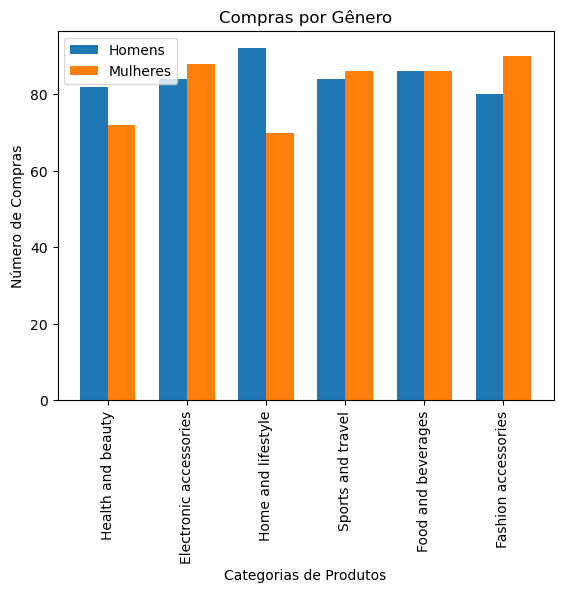

In [66]:
fig, ax = plt.subplots()
bar_width = 0.35


barra_homem = ax.bar(index, transacoes_homem, bar_width, label='Homens')
barra_mulher = ax.bar(index + bar_width, transacoes_mulher, bar_width, label='Mulheres')

ax.set_xlabel('Categorias de Produtos')
ax.set_ylabel('Número de Compras')
ax.set_title('Compras por Gênero')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(produtos, minor=False, rotation=90)
ax.legend()

plt.show()


## Meio de pagamento x membership (tentar vender cartão da c&a.)

In [41]:
pagamento_total = df['Total'].sum()
pagamento_total

329995.701

In [42]:
pagamentos_membros = df.loc[df['Customer type'] == 'Member', ['Payment', 'Total']]
pagamentos_membros

,Payment,Total
0,Ewallet,548.9715
3,Ewallet,489.0480
6,Ewallet,433.6920
8,Credit card,76.1460
9,Credit card,172.7460
...,...,...
991,Credit card,206.4300
992,Ewallet,212.6880
993,Credit card,127.2600
998,Cash,103.0365


In [43]:
pagamentos_nao_membros = df.loc[df['Customer type'] == 'Normal', ['Payment', 'Total']]
pagamentos_nao_membros

,Payment,Total
1,Cash,80.2200
2,Credit card,340.5255
4,Ewallet,634.3785
5,Ewallet,627.6165
7,Ewallet,772.3800
...,...,...
990,Ewallet,72.8700
994,Ewallet,209.7690
995,Cash,637.7280
996,Cash,132.7620


In [44]:
total_pagamentos_membros = pagamentos_membros.groupby('Payment')['Total'].sum()
total_pagamentos_membros

Payment
Cash           57493.254
Credit card    59191.587
Ewallet        48030.045
Name: Total, dtype: float64

In [45]:
total_pagamentos_nao_membros = pagamentos_nao_membros.groupby('Payment')['Total'].sum()
total_pagamentos_nao_membros

Payment
Cash           64925.070
Credit card    41029.821
Ewallet        59325.924
Name: Total, dtype: float64

In [46]:
percentual_membros = (total_pagamentos_membros / total_pagamentos_membros.sum()) * 100
percentual_membros

Payment
Cash           34.904710
Credit card    35.935785
Ewallet        29.159505
Name: Total, dtype: float64

In [47]:
percentual_nao_membros = (total_pagamentos_nao_membros / total_pagamentos_nao_membros.sum()) * 100
percentual_nao_membros

Payment
Cash           39.281673
Credit card    24.824309
Ewallet        35.894017
Name: Total, dtype: float64

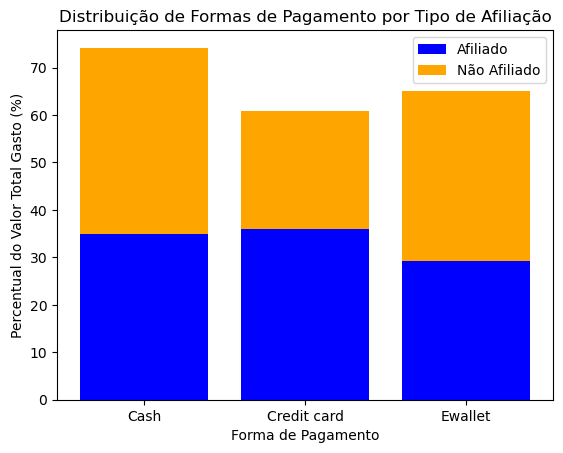

In [48]:
fig, ax = plt.subplots()

ax.bar(percentual_membros.index, percentual_membros, label='Afiliado', color='blue')
ax.bar(percentual_nao_membros.index, percentual_nao_membros, label='Não Afiliado', bottom=percentual_membros, color='orange')


plt.xlabel('Forma de Pagamento')
plt.ylabel('Percentual do Valor Total Gasto (%)')
plt.title('Distribuição de Formas de Pagamento por Tipo de Afiliação')
plt.legend()
plt.show()
